# 1-单变量线性回归
## 案例：根据不同城市人口数据预测利润
### 我们拥有不同城市人口数据及利润：ex1data1.txt

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])

In [38]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [39]:
data.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [40]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


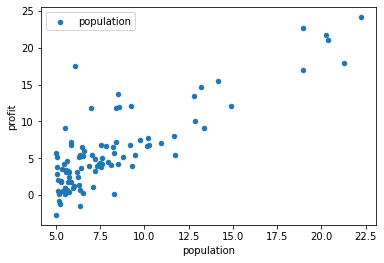

In [41]:
data.plot.scatter('population','profit',label='population') #绘制散点图
plt.show()

In [42]:
data.insert(0,'ones',1) #插入‘1’列
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [43]:
X = data.iloc[:,0:-1] #X数据切片
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [44]:
y = data.iloc[:,-1] #y数据切片
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [45]:
X = X.values #将dataframe数据类型转换为数组类型
X.shape # 查看数组维数

(97, 2)

In [46]:
y = y.values

In [47]:
y.shape

(97,)

In [48]:
y = y.reshape(97,1) #将y改成二维数组格式
y.shape

(97, 1)

In [49]:
def costFunction(X,y,theta):
    """损失函数定义"""
    inner =np.power(X @ theta - y,2) #np.power求幂
    return np.sum(inner)/(2*len(X)) #np.sum求和

In [50]:
theta = np.zeros((2,1)) #初始化参数theta
theta.shape

(2, 1)

In [51]:
cost_init=costFunction(X,y,theta) #初始化损失函数
print(cost_init)

32.072733877455676


In [52]:
def gradientDescent(X,y,theta,alpha,iters):
    """
    梯度下降函数定义
    alpha为学习率，iters为迭代次数
    """
    costs = []#存放每次迭代的损失函数值
    
    for i in range(iters):
        theta = theta - alpha * (X.T @ (X @ theta - y)) / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i%100 == 0: #打印迭代函数值
            print(cost)
    
    return theta,costs

In [53]:
alpha = 0.02 #初始化参数
iters = 2000

theta,costs = gradientDescent(X,y,theta,alpha,iters)#梯度下降

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934662
4.476972940603823


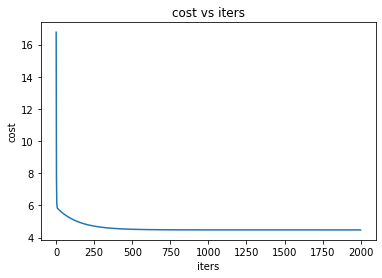

In [54]:
fig,ax = plt.subplots() #创建绘图实例
ax.plot(np.arange(iters),costs) #np.arange生成列表
ax.set(xlabel='iters',ylabel='cost',title='cost vs iters')
plt.show()

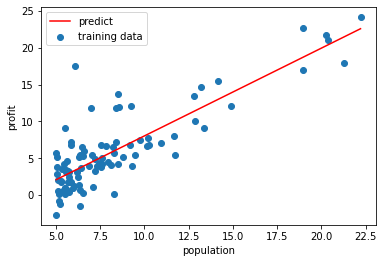

In [57]:
x = np.linspace(X[:,-1].min(),X[:,-1].max(),100)
y_ = theta[0,0]+theta[1,0]*x #拟合后的函数

fig,ax = plt.subplots()
ax.scatter(X[:,-1],y,label='training data')
ax.plot(x,y_,'r',label='predict')
ax.legend()
ax.set(xlabel='population',ylabel='profit')
plt.show()